In [3]:
!pyenv global 3.13.7
!python.exe -m pip install --upgrade pip
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
XML_INPUT_FILES = "data\export_with_url.xml"

lan_text = {}

for lan in ['de', 'fr', 'it']:
    with open(f'data/export_with_url_{lan}.xml', 'r', encoding='utf-8') as f:
        xml_text = f.read()
    lan_text[lan] = xml_text

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\terra\AppData\Local\Temp\ipykernel_20168\2064819737.py:1: SyntaxWarning: invalid escape sequence '\e'
  XML_INPUT_FILES = "data\export_with_url.xml"


In [20]:
# read xml_text and print top 100 characters
print(xml_text[:6000])

<?xml version="1.0" encoding="UTF-8"?>
<results>
  <corpus>
    <version>2</version>
    <revision>2.0</revision>
    <url>https://www.liri.uzh.ch/en/services/swissdox.html</url>
    <name>Swissdox@LiRI</name>
    <corpusDescription>The Swissdox@LiRI database comprises 23+ million published media articles in German, French and Italian from a wide range of Swiss media sources (both print and digital) covering many decades.</corpusDescription>
    <date>2025-07</date>
    <total_tokens lang="de">9288157785</total_tokens>
    <total_tokens lang="fr">2281943994</total_tokens>
    <total_tokens lang="it">37486238</total_tokens>
  </corpus>
  <query>
    <date>2025-11-16 21:22:45.608537+00:00</date>
    <languages>
      <language>it</language>
    </languages>
    <offset>0</offset>
    <requested>10000</requested>
    <full>False</full>
    <delivered>1969</delivered>
    <coverage>100.0</coverage>
    <json>
  {
    "query": [
      {
        "unit": {
          "layer": "Article",
      

In [21]:
# The xml is table format. We need to parse it and extract relevant fields.
# Get the part <stats>...</stats> and extract relevant fields.
# The relevant item is on <observation>...</observation> with fields: <a_head>, <a_pubdate>, <a_source>, <a_articleURL>
# and turn them into a pandas dataframe.
import pandas as pd
from xml.etree import ElementTree as ET

data = []
for lan, xml_text in lan_text.items():
    root = ET.fromstring(xml_text)
    observations = root.findall('.//observation')

    for obs in observations:
        a_head = obs.find('a_head').text if obs.find('a_head') is not None else None
        a_pubdate = obs.find('a_pubdate').text if obs.find('a_pubdate') is not None else None
        a_source = obs.find('a_source').text if obs.find('a_source') is not None else None
        a_articleURL = obs.find('a_articleURL').text if obs.find('a_articleURL') is not None else None
        a_subhead = obs.find('a_subhead').text if obs.find('a_subhead') is not None else None
        data.append({
            'head': a_head,
            'pubdate': a_pubdate,
            'source': a_source,
            'articleURL': a_articleURL,
            'subtitle': a_subhead,
            'language': lan
        })
    
df = pd.DataFrame(data)
# draw bar time series of number of articles per month
# in x label data put only years
df['pubdate'] = pd.to_datetime(df['pubdate'], errors='coerce')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23191 entries, 0 to 23190
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   head        23191 non-null  object        
 1   pubdate     23191 non-null  datetime64[ns]
 2   source      23191 non-null  object        
 3   articleURL  23191 non-null  object        
 4   subtitle    10165 non-null  object        
 5   language    23191 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


In [6]:
df['source'].unique()

array(['TA', 'CASO', 'SHZ', 'FUWO', 'NZZS', 'SGTO', 'SIO', 'SGT', 'NZZO',
       'HZI', 'BU', 'NNBE', 'SRF', 'SRFA', 'SHZO', 'NNBU', 'FUW', 'NZZ',
       'ZWAO', 'NNBS', 'ZHUL', 'BEOLO', 'BZ', 'SWII', 'NNTA', 'LBO',
       'ZSZO', 'BAZ', 'NZZG', 'NLZ', 'LTZO', 'BIZ', 'LTZ', 'ZHUO', 'BLIO',
       'LUZO', 'BLI', 'AZM', 'LUZ', 'WEW', 'ZWA', 'WOZ', 'BLIA', 'GTB',
       'FACT', 'BT', 'LATO', 'BZBO', 'SRFV', 'LB', 'THTO', 'APPZ', 'NMZ',
       'TAE', 'NZZF', 'BZB', 'BZM', 'OBW', 'SFTV', 'BEOO', 'TAS', 'NN',
       'SOZO', 'WEOB', 'THT', 'BIZO', 'URZ', 'NIW', 'TASI', 'SBLI', 'TVS',
       'AZO', 'TBT', 'TAM', 'SOZM', 'ZSZ', 'SF', 'ZN', 'OLT', 'SONT',
       'TVLL', 'ZOF', 'OAS', 'BEOL', 'WEWD', 'GP', 'SI', 'TZ', 'TAZT',
       'NZZM', 'ZUGP', 'SCHV', 'ZUGZ', 'WZ', 'CASH', 'TELE', 'BEO',
       'NZZB', 'BOL', 'NLZS', 'LAL', 'GTBO', 'NNTZ', 'NEWS', 'BTO', 'BRS',
       'AZ', 'SAW', 'SAS', 'OLTO', 'HEUT', 'SWO', 'WEWO', 'SIS', 'BEON',
       'LTB', 'ZWAF', 'SIG', 'SCHB', 'CVAL', 'GES', 'CDAY',

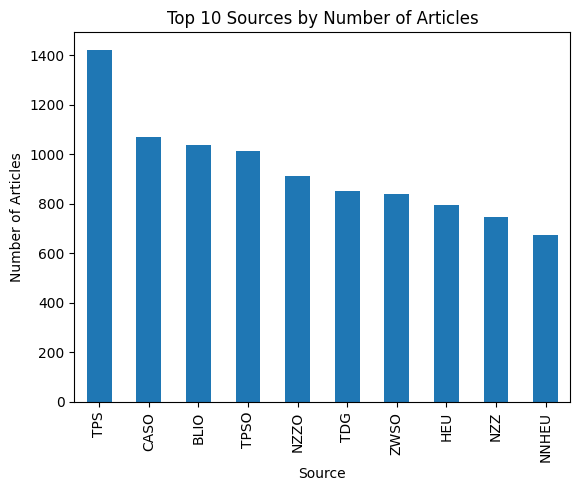

In [7]:
# draw bar chart of top 10 sources
import matplotlib.pyplot as plt 
top_sources = df['source'].value_counts().head(10)
top_sources.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.title('Top 10 Sources by Number of Articles')
plt.show()

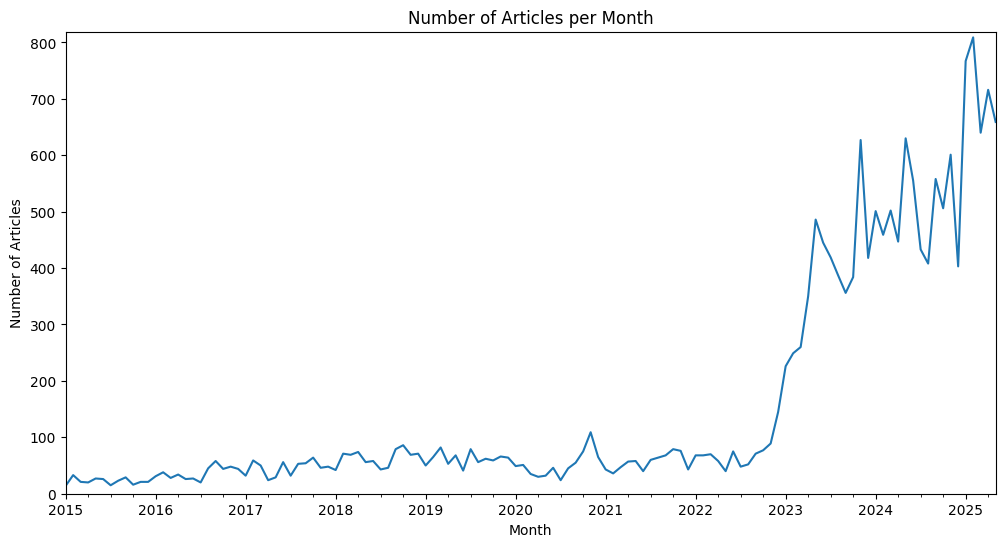

In [8]:
# set starting date to 2020-01-01
# set y axis start from 0 to max number of articles per month + 10
df_draw = df.copy()

df_draw = df_draw[df_draw['pubdate'] >= '2015-01-01']
df_draw.set_index('pubdate', inplace=False)
ax = df_draw.resample('ME', on='pubdate').size().plot(kind='line', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month')
ax.set_ylim(0, df_draw.resample('ME', on='pubdate').size().max() + 10)
plt.show()

C:\Users\terra\AppData\Local\Temp\ipykernel_20168\3468180978.py:6: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ax = df_draw.groupby('source').resample('ME', on='pubdate').size().unstack(0).plot(kind='line', figsize=(12,6))


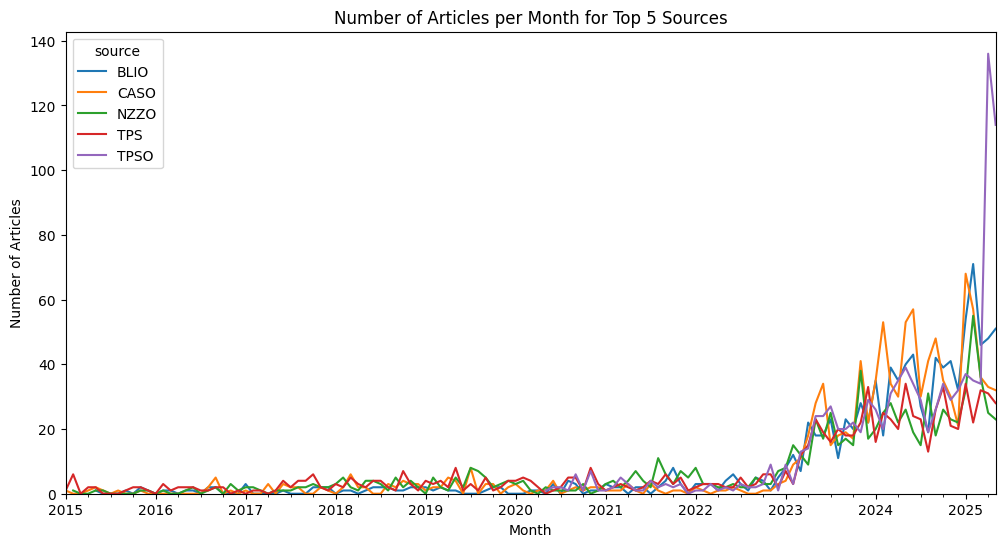

In [13]:
# set top 5 sources and draw line chart of number of articles per month for each source
df_draw = df.copy()
top_5_sources = df_draw['source'].value_counts().head(5).index.tolist()
df_draw = df_draw[df_draw['source'].isin(top_5_sources)]
df_draw = df_draw[df_draw['pubdate'] >= '2015-01-01']
ax = df_draw.groupby('source').resample('ME', on='pubdate').size().unstack(0).plot(kind='line', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month for Top 5 Sources')
ax.set_ylim(0, )
plt.show()

C:\Users\terra\AppData\Local\Temp\ipykernel_20168\28888328.py:5: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ax = df_draw.groupby('source').resample('ME', on='pubdate').size().unstack(0).plot(kind='line', figsize=(12,6))


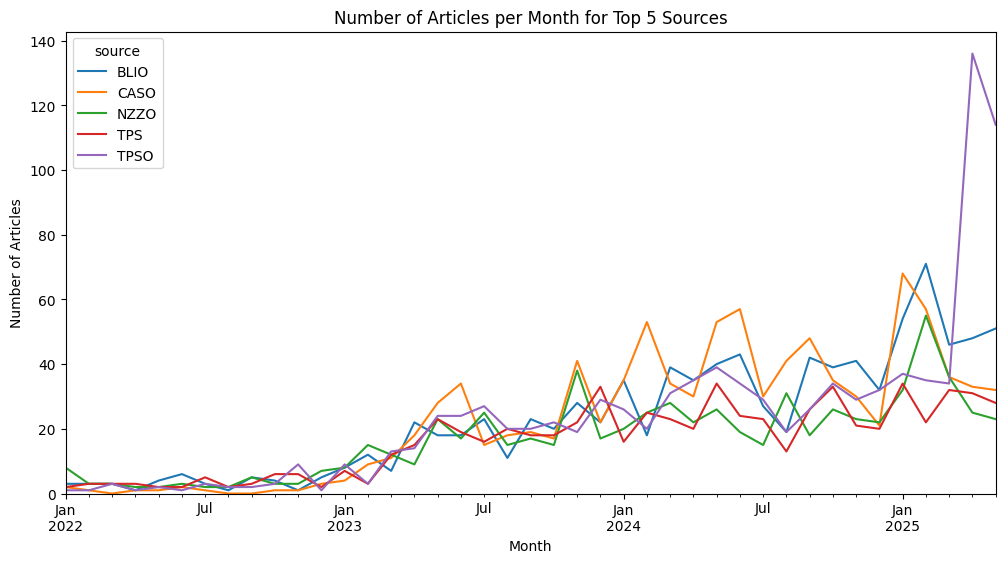

In [26]:
df_draw = df.copy()
top_5_sources = df_draw['source'].value_counts().head(5).index.tolist()
df_draw = df_draw[df_draw['source'].isin(top_5_sources)]
df_draw = df_draw[df_draw['pubdate'] >= '2022-01-01']
ax = df_draw.groupby('source').resample('ME', on='pubdate').size().unstack(0).plot(kind='line', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month for Top 5 Sources')

ax.set_ylim(0, )
plt.show()

C:\Users\terra\AppData\Local\Temp\ipykernel_20168\1198249334.py:3: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ax = df_draw.groupby('language').resample('ME', on='pubdate').size().unstack(0).plot(kind='line', figsize=(12,6))


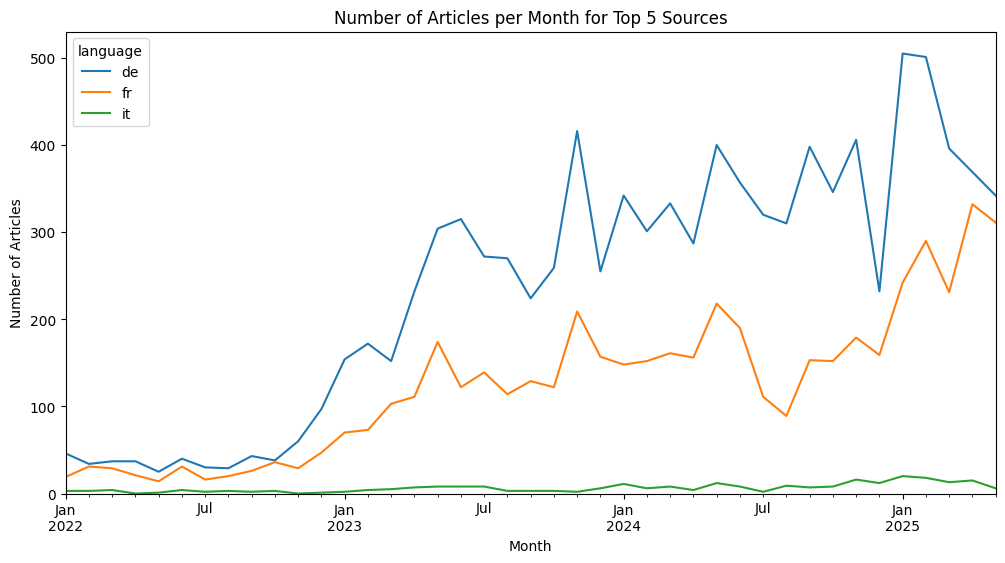

In [30]:
df_draw = df.copy()
df_draw = df_draw[df_draw['pubdate'] >= '2015-01-01']
ax = df_draw.groupby('language').resample('ME', on='pubdate').size().unstack(0).plot(kind='line', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month for Top 5 Sources')
ax.set_ylim(0, )
ax.set_xlim(pd.Timestamp('2022-01-01'), )
plt.show()

In [25]:
df.head()

,head,pubdate,source,articleURL,subtitle,language,title_full
0,Messi spricht jetzt sogar Englisch,2023-09-18,TA,None,None,de,Messi spricht jetzt sogar Englisch
1,Presseschau vom Wochenende 18 (29./30. April),2023-04-30,CASO,https://www.cash.ch/borsen-ticker/borse-schwei...,None,de,Presseschau vom Wochenende 18 (29./30. April)
2,Im Rausch der künstlichen Intelligenz,2024-05-16,SHZ,None,None,de,Im Rausch der künstlichen Intelligenz
3,Kaffee mit Chen Qiufan: «Künstliche Intelligen...,2022-10-14,FUWO,https://www.fuw.ch/kuenstliche-intelligenz-wir...,None,de,Kaffee mit Chen Qiufan: «Künstliche Intelligen...
4,Wer hat die beste KI?,2024-12-15,NZZS,None,None,de,Wer hat die beste KI?


In [23]:
# merge title and subtile into one column 'title_full' and drop subtitle if it is 'None'
df['title_full'] = df.apply(lambda row: row['head'] if pd.isna(row['subtitle']) or pd.isna(row['head']) else f"{row['head']} - {row['subtitle']}", axis=1)

# extract df as csv
df[df['language']=='de'].to_csv('swiss_ai_discourse_articles_de.csv', index=False)

### Questions
 - Can we sample language as a percentage of total articles over time?
    - we cannot identify whether one language group is more into the AI
- Topic wise modeling -> do we need multi translation?